# Remote Work & Mental Health 🌍🧠

This dataset cames from the [Kaggle](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health).

This dataset examines the impact of remote work on mental health, gathering responses from individuals across various demographics. It includes key metrics such as job satisfaction, anxiety levels, and work-life balance.

Index:
1. [Reading the Data](#1.-Reading-the-Data)
2. [Data Cleaning](mental_health.ipynb#data-cleaning)

Hipóteses

1. objetivo: estudar o impacto do remote work na nossa saude mental

2
a) detalhar a população a nível pessoal: x pessoas, percentagem de cada genero (Gender) e utilizar Region e Year  
b) detalhar a população a nível de trabalho e no work location  

3) testar hipóteses:
   - será que existe regiões onde o remote work impacta mais a nossa saúde mental?
   - verificar se existe profissões onde trabalhar remotamente impacta mais a nossa saude mental?
   - será que o número de reuniões e/ou número de horas tem efeito?
   - será que praticar desporto e/ou dormir bem tem impacto?
   - será que existe uma correlação entre pessoas novas e doenças mentais? (+ novas, +probabilidade de doenças?)
   - será que é possível encontrar um perfil mais provavel de não se adaptar bem ao remote work?
   - será que as pessoas com maior social isolation rating estão mais satisfeitas com o remote work?
   ou pode levar situações de stress e ansiedade?



## Reading the data

In [1]:
import pandas as pd

In [2]:
file = "kaggle/input/Impact_of_Remote_Work_on_Mental_Health.csv"
df = pd.read_csv(file, encoding="utf-8")

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Dataset Descriptive Statistics

### People Demographics

In [11]:
print('Population statistics')
print('--'*20)
print(f'Total: {df.shape[0]}')
print(f'Avarage Age: {df["Age"].mean():.0f}')

Population statistics
----------------------------------------
Total: 5000
Avarage Age: 41


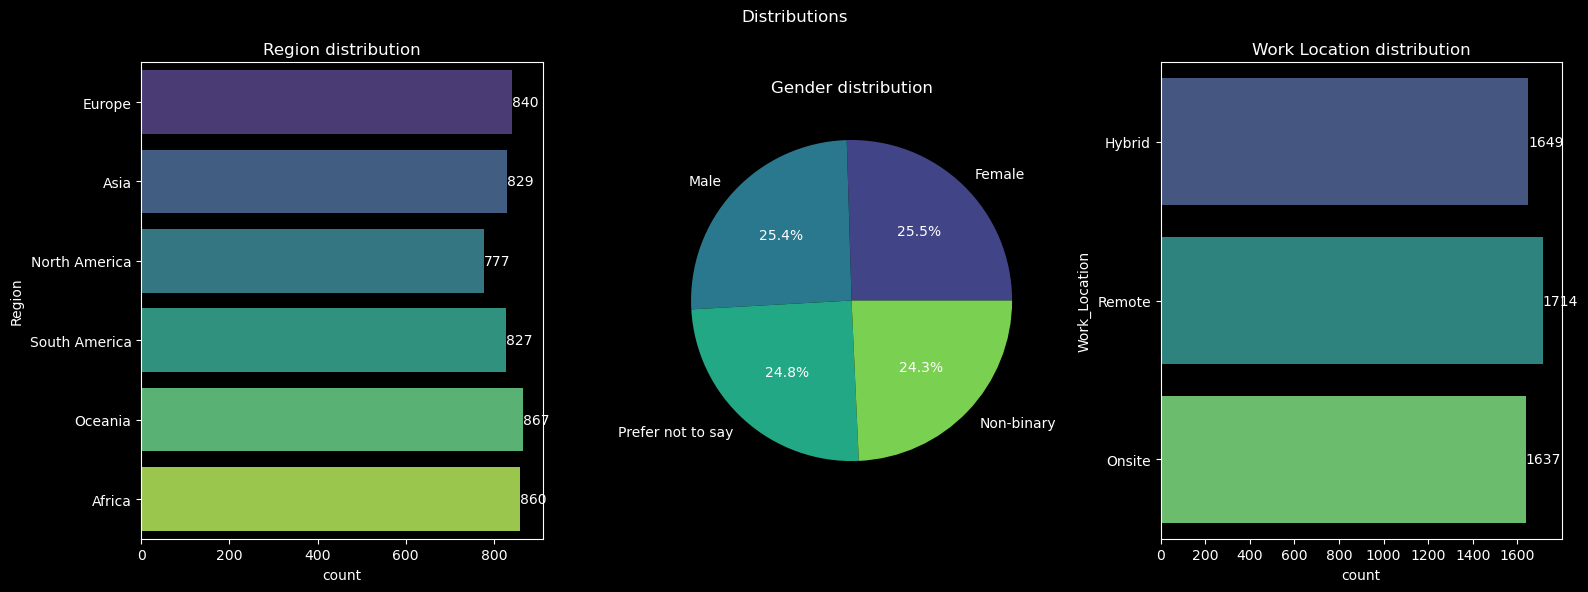

In [12]:
# Bar chart of region distribution using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("dark_background")
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Distributions')


# Region distribution
plt.title('Region distribution')
sns.countplot(data=df, y='Region', palette='viridis', hue='Region', ax=axes[0])
axes[0].set_title('Region distribution')
for container in axes[0].containers:
    axes[0].bar_label(container)


# # Gender
axes[1].set_title('Gender distribution')
axes[1].pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index,
            autopct='%1.1f%%',
            colors=sns.color_palette('viridis', len(df.Gender.value_counts()))
)

# Work Location
axes[2].set_title('Work Location distribution')
sns.countplot(data=df, y='Work_Location', palette='viridis', hue='Work_Location', 
              ax=axes[2]
)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Plotting
plt.tight_layout()
plt.show()


### Continuous Variables Distribution

                                  mean    std   min   50%   max
Age                              40.99  11.30  22.0  41.0  60.0
Years_of_Experience              17.81  10.02   1.0  18.0  35.0
Hours_Worked_Per_Week            39.61  11.86  20.0  40.0  60.0
Number_of_Virtual_Meetings        7.56   4.64   0.0   8.0  15.0
Work_Life_Balance_Rating          2.98   1.41   1.0   3.0   5.0
Social_Isolation_Rating           2.99   1.39   1.0   3.0   5.0
Company_Support_for_Remote_Work   3.01   1.40   1.0   3.0   5.0


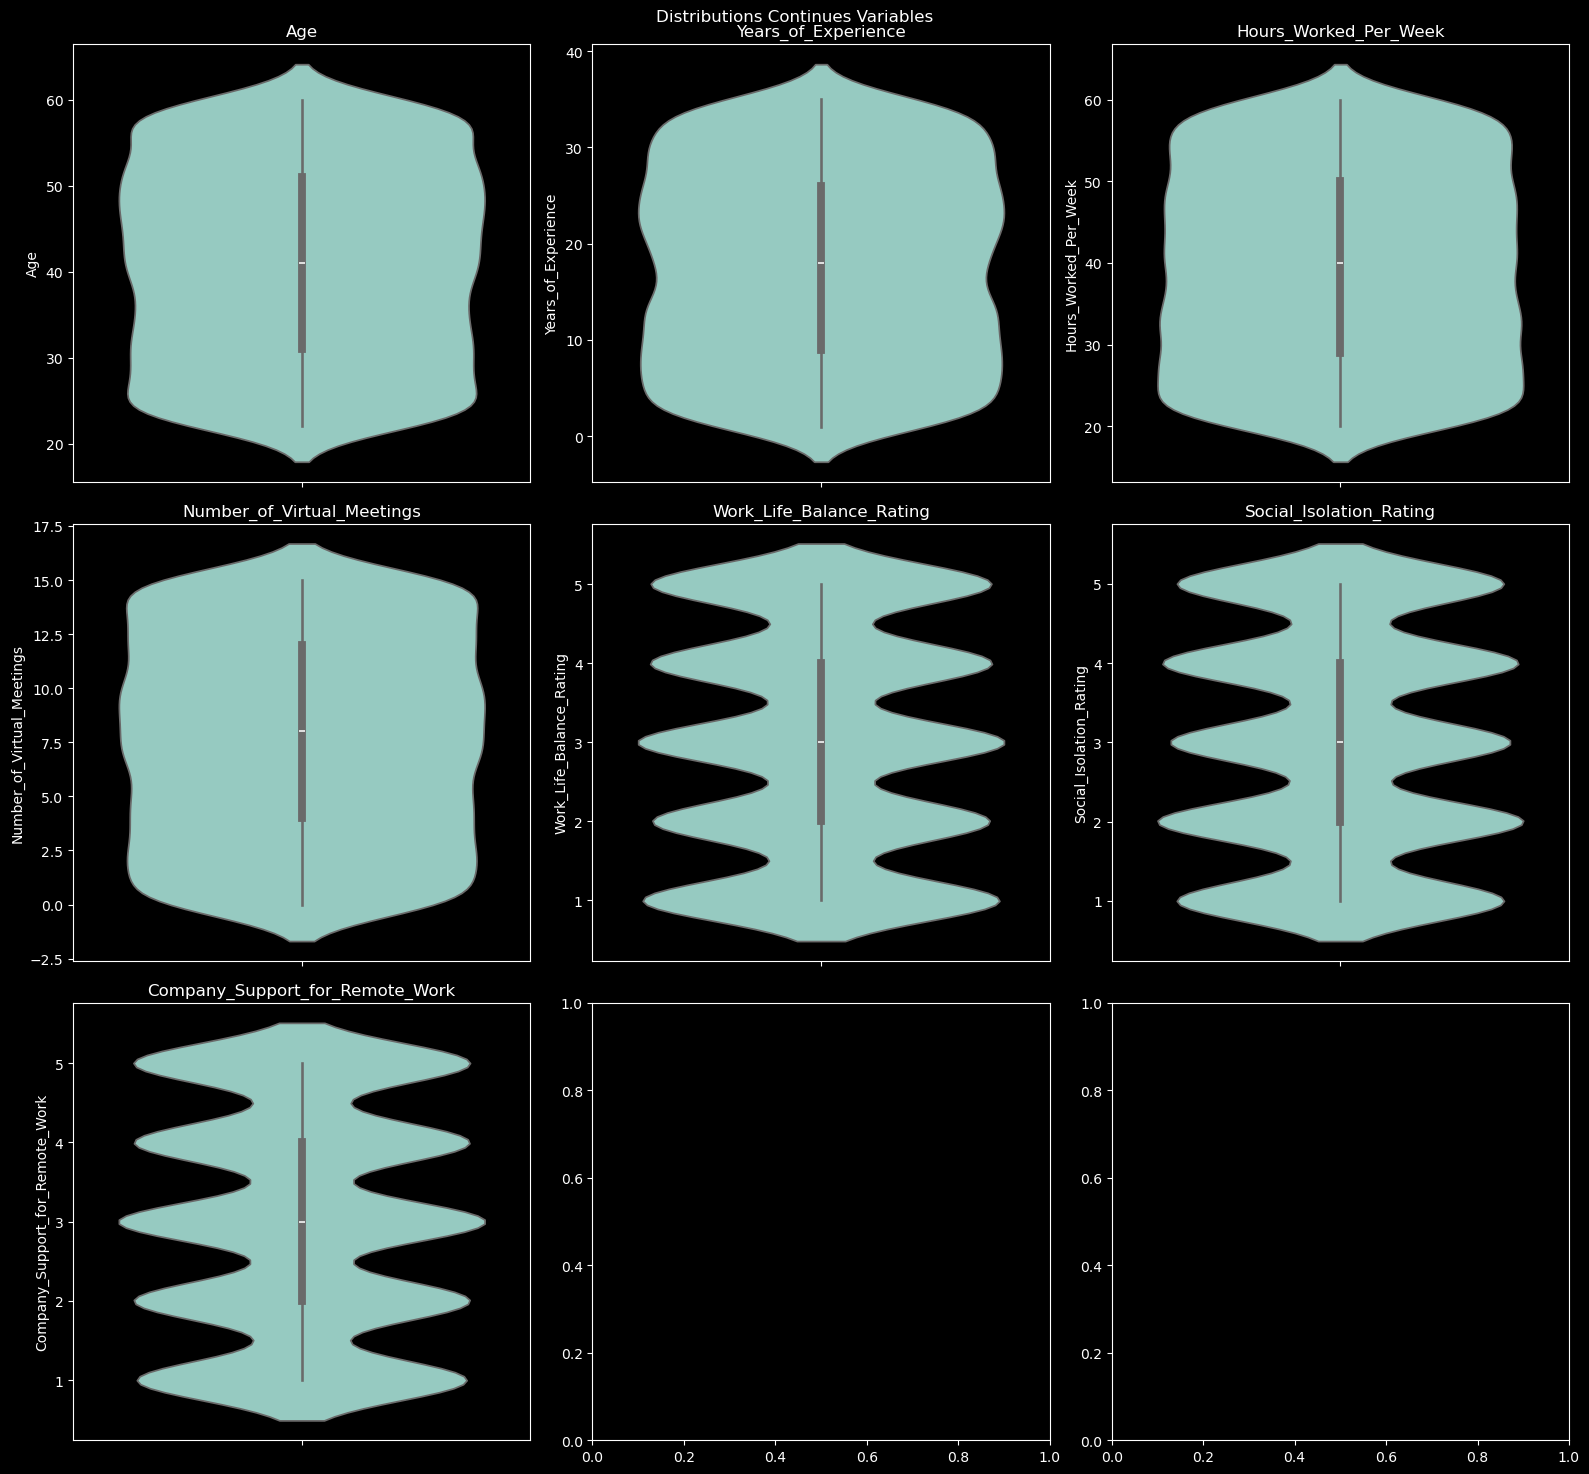

In [47]:
# Dataframe describe
desc = df.describe().T.drop(['count', '25%', '75%'], axis=1).map(lambda x: round(x, 2))

print(desc)

fig, axes = plt.subplots(3, 3, figsize=(16, 15))
fig.suptitle('Distributions Continues Variables')

for i, col in enumerate(desc.index):
    sns.violinplot(df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout()
plt.show()

## Data Cleaning

### Fill NaN

In [7]:
print('Verificar se existem valores nulos')
print('--'*20)
df.isna().sum()

Verificar se existem valores nulos
----------------------------------------


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

There are empty values for the columns Mental_Health_Condition and Physical_Activity.

These values make sense, as they mean absence of mental health condition and absence of physical activity.

Thus, we will fill these empty values with the string "None".

In [46]:
print('Before the fillna')
print('--'*20)
print(pd.DataFrame(df.Mental_Health_Condition.value_counts(dropna=False)))
print(df.Physical_Activity.value_counts(dropna=False))

df.Mental_Health_Condition = df.Mental_Health_Condition.fillna('No Condition')
df.Physical_Activity = df.Physical_Activity.fillna('No Activity')

print('After the fillna')
print('--'*20)
print(df.Mental_Health_Condition.value_counts(dropna=False))
print(df.Physical_Activity.value_counts(dropna=False))


Before the fillna
----------------------------------------
                         count
Mental_Health_Condition       
Burnout                   1280
Anxiety                   1278
Depression                1246
No Condition              1196
Physical_Activity
2    1755
1    1629
0    1616
Name: count, dtype: int64
After the fillna
----------------------------------------
Mental_Health_Condition
Burnout         1280
Anxiety         1278
Depression      1246
No Condition    1196
Name: count, dtype: int64
Physical_Activity
2    1755
1    1629
0    1616
Name: count, dtype: int64


## Plotting

### Categories Values

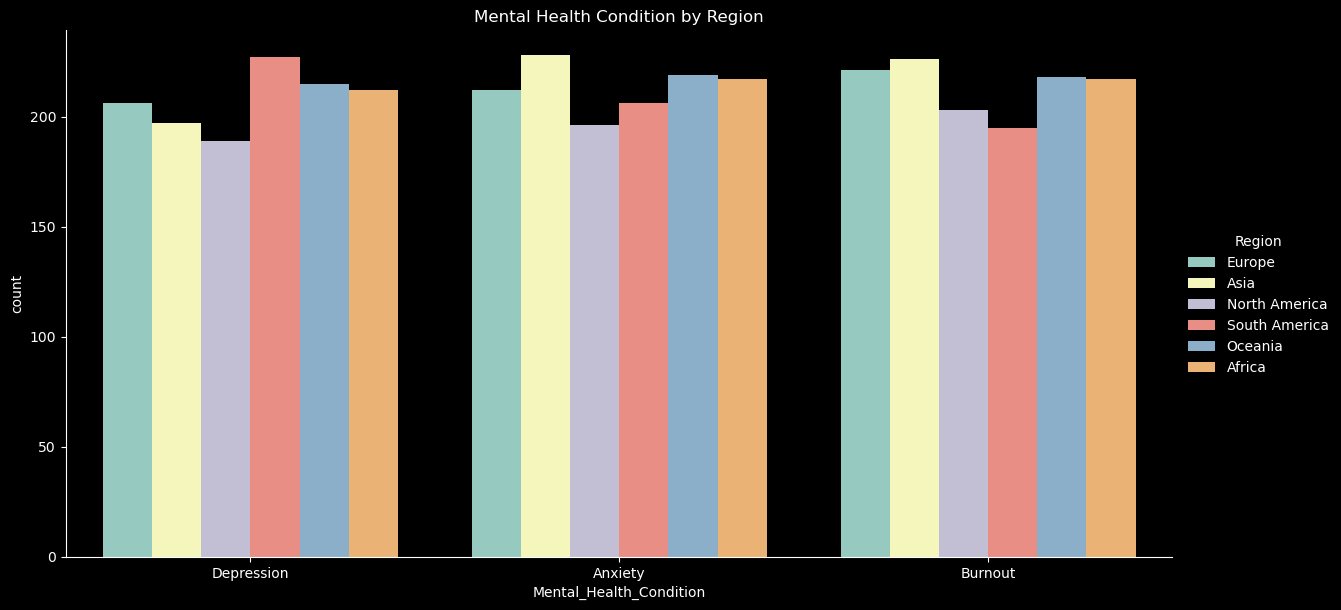

In [106]:
df_ = df[~(df['Mental_Health_Condition'] == 'No Condition')]
g = sns.catplot(data=df_, 
            x="Mental_Health_Condition", kind="count", 
            hue="Region",
            height=6, aspect=2)
plt.title('Mental Health Condition by Region')
plt.show()

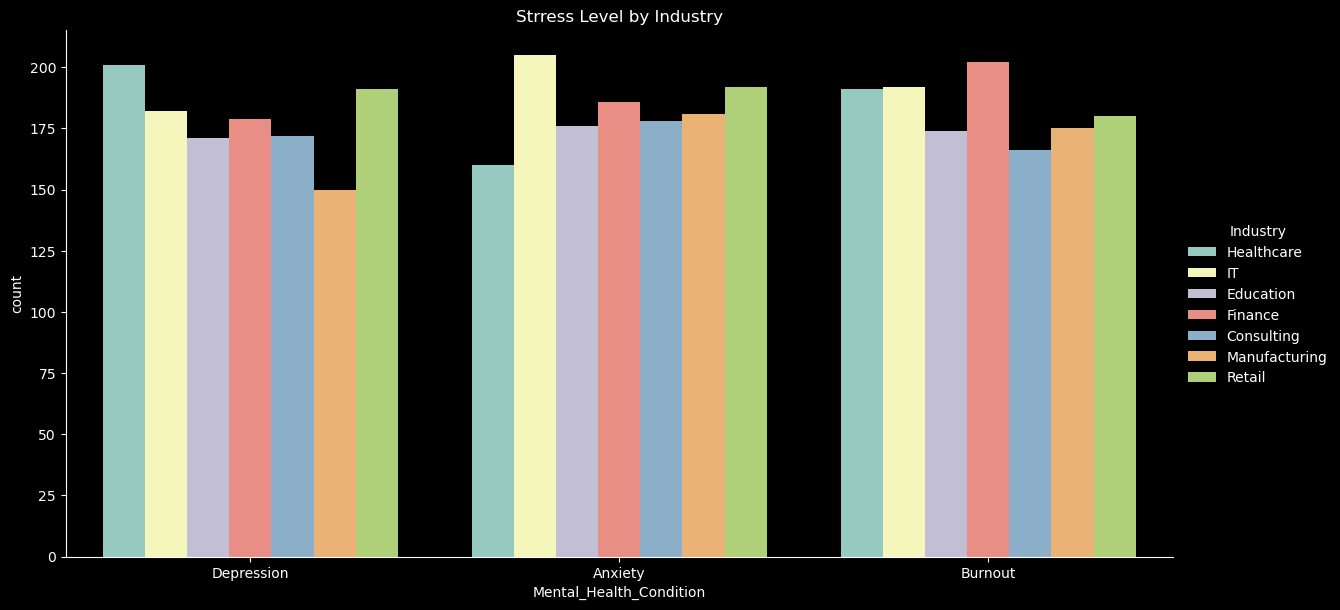

In [109]:
df_ = df[~(df['Mental_Health_Condition'] == 'No Condition')]
g = sns.catplot(data=df_, 
            x="Mental_Health_Condition", kind="count", 
            hue="Industry",
            height=6, aspect=2)
plt.title('Mental Health Condition by Industry')
plt.show()


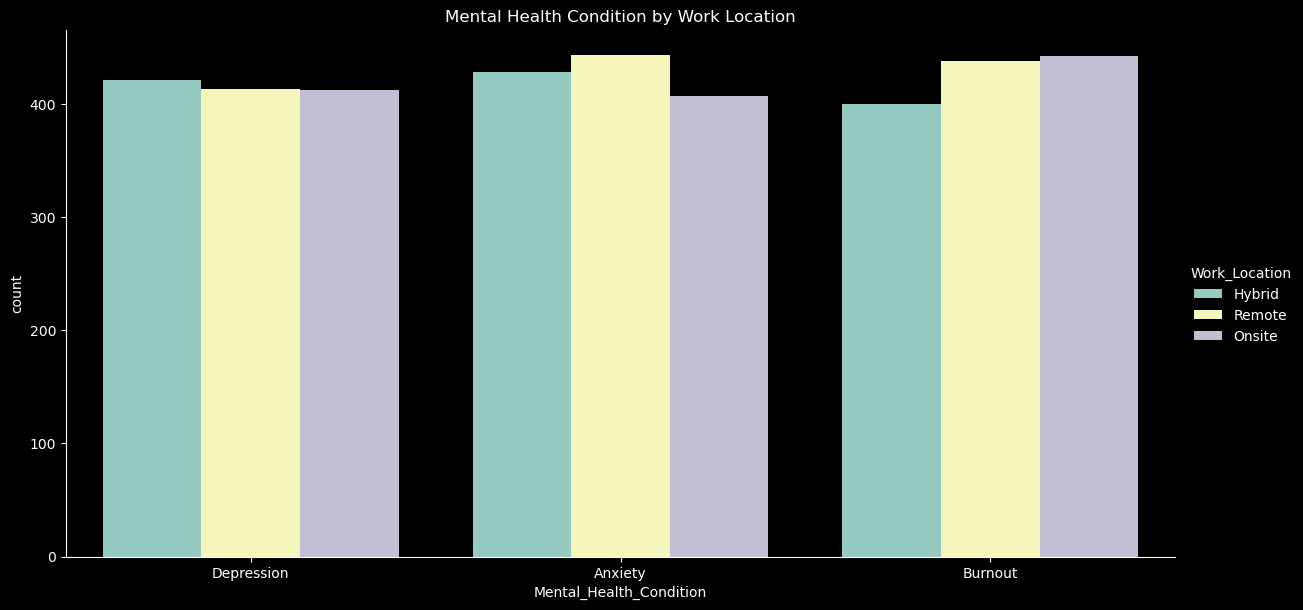

In [112]:
df_ = df[~(df['Mental_Health_Condition'] == 'No Condition')]
g = sns.catplot(data=df_, 
            x="Mental_Health_Condition", kind="count", 
            hue="Work_Location",
            height=6, aspect=2)
plt.title('Mental Health Condition by Work Location')
plt.show()

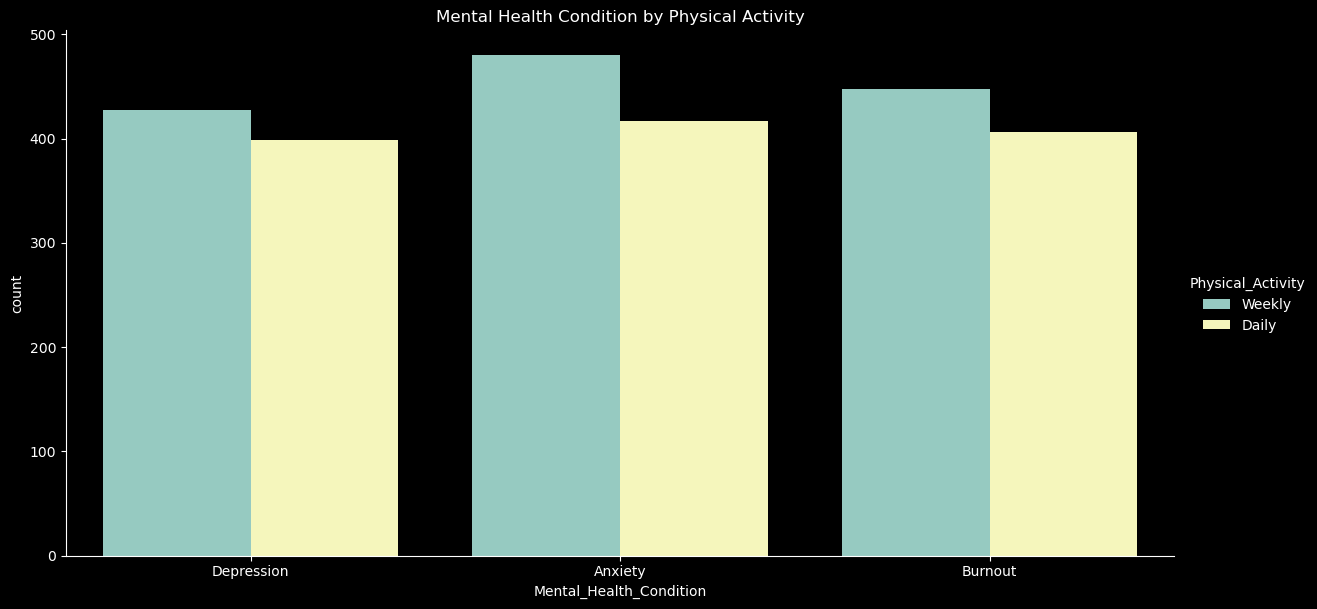

In [115]:
# df_ = df[~(df['Mental_Health_Condition'] == 'No Condition')]
g = sns.catplot(data=df, 
            x="Mental_Health_Condition", kind="count", 
            hue="Physical_Activity",
            height=6, aspect=2)
plt.title('Mental Health Condition by Physical Activity')
plt.show()

### Varibles Correlation

<Figure size 1000x400 with 0 Axes>

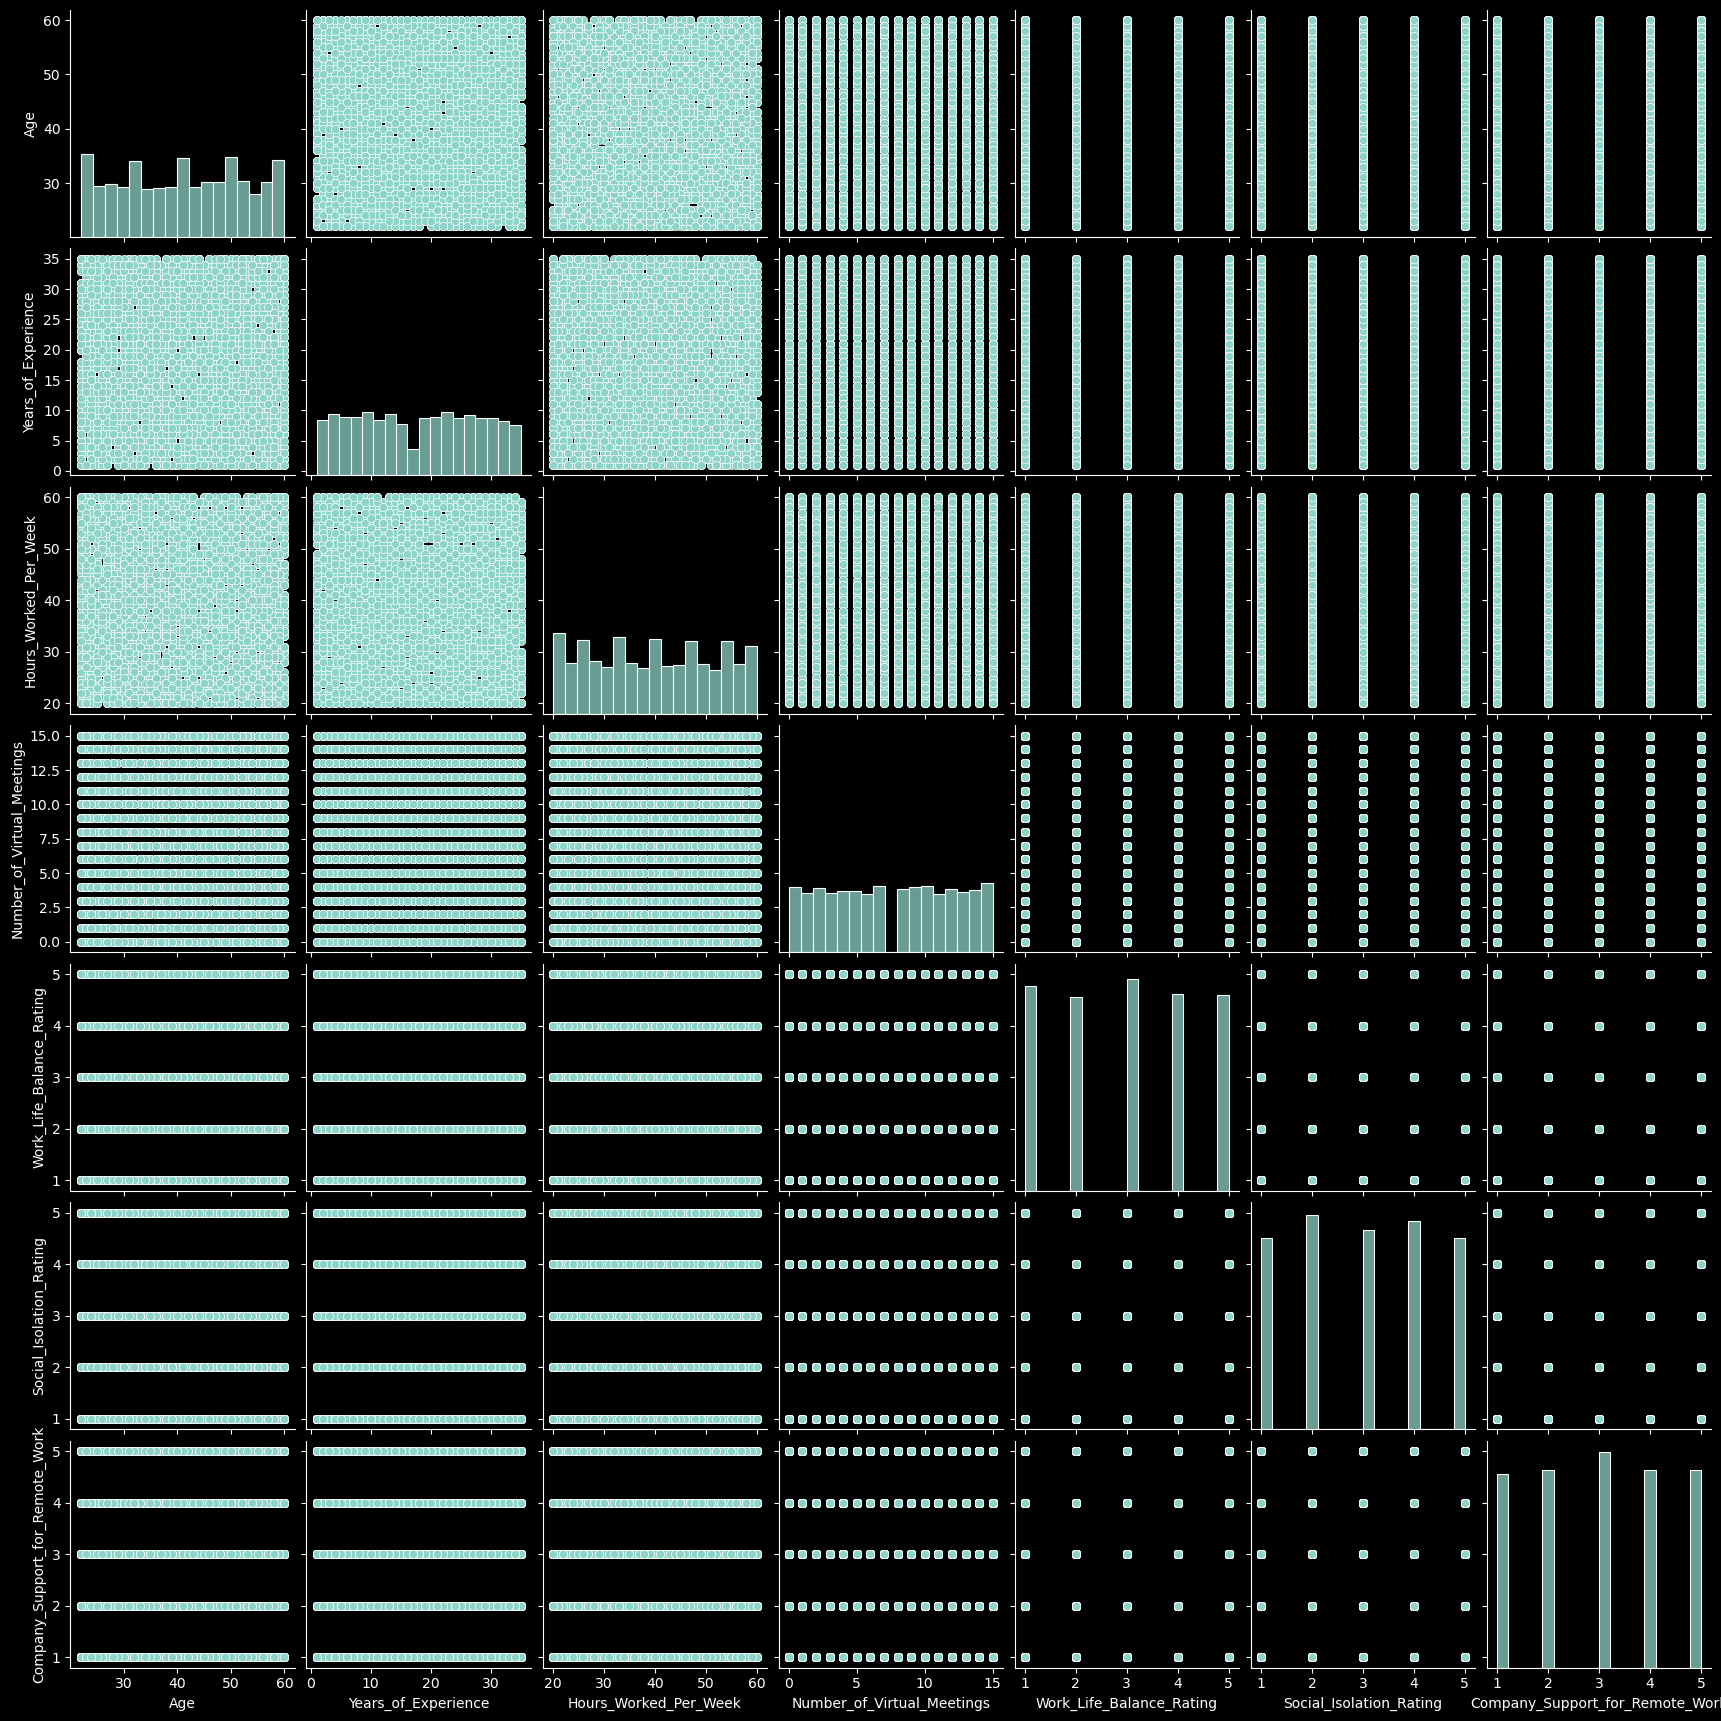

In [48]:
plt.figure(figsize=(10, 4))
sns.pairplot(df)
plt.show()  

### Correlation between variables

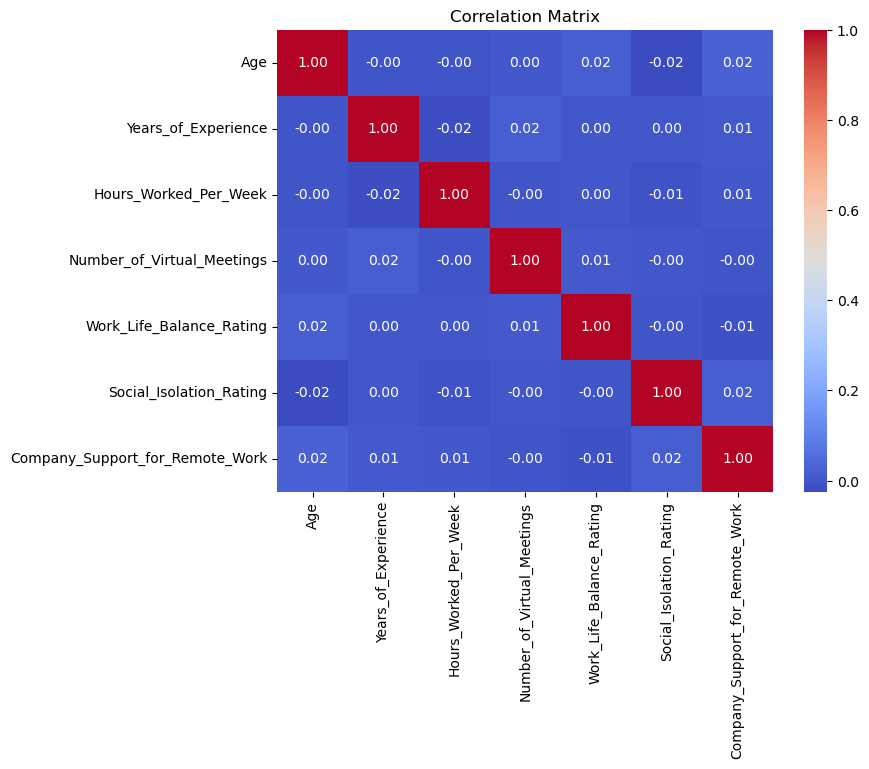

In [14]:
import matplotlib.pyplot as plt 


correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Model Selection, Feature Engineering, and Normalization

### The Problem

We predict the mental health condition of a person based on the features in the dataset.

### Model Selection

The basic and most common models for classification are:

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines
- K-Nearest Neighbors

We will use the Decision Trees model.

### Feature Engineering

##### Enconder

In [17]:
from sklearn.preprocessing import LabelEncoder

# Drop of Employee_ID
df = df.drop(columns='Employee_ID')

le = LabelEncoder()
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Region', 'Stress_Level', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Access_to_Mental_Health_Resources']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

##### Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

# For Age, Years_of_Experience, Number_of_Virtual_Meetings, Hours_Worked_Per_Week
for col in ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings', 'Hours_Worked_Per_Week']:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

## Supervised Learning

#### Splitting the Data

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [39]:
# Features and target
X = df.drop(columns=['Mental_Health_Condition'])

y = df['Mental_Health_Condition']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Training the Model

In [27]:
# Trying a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluating the Model

In [41]:
# Make predictions on the validation set
y_pred = clf.predict(X_valid)

print(classification_report(y_valid, y_pred, target_names=clf.classes_))


              precision    recall  f1-score   support

     Anxiety       0.29      0.29      0.29       263
     Burnout       0.26      0.25      0.25       255
  Depression       0.24      0.24      0.24       254
No Condition       0.20      0.21      0.20       228

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



### Confusion Matrix

In [44]:
confusion_matrix(y_valid, y_pred)

NameError: name 'confusion_matrix' is not defined

#### Metric Evaluation

The problem state of classifying mental diaseses for a person.

There are two error types:
1. The person has a mental disease and the model does not predict it -> False Positive
2. The person does not have a mental disease and the model predicts it -> False Negative

In this model, the most important metric is the recall, as we want to minimize the number of false negatives.


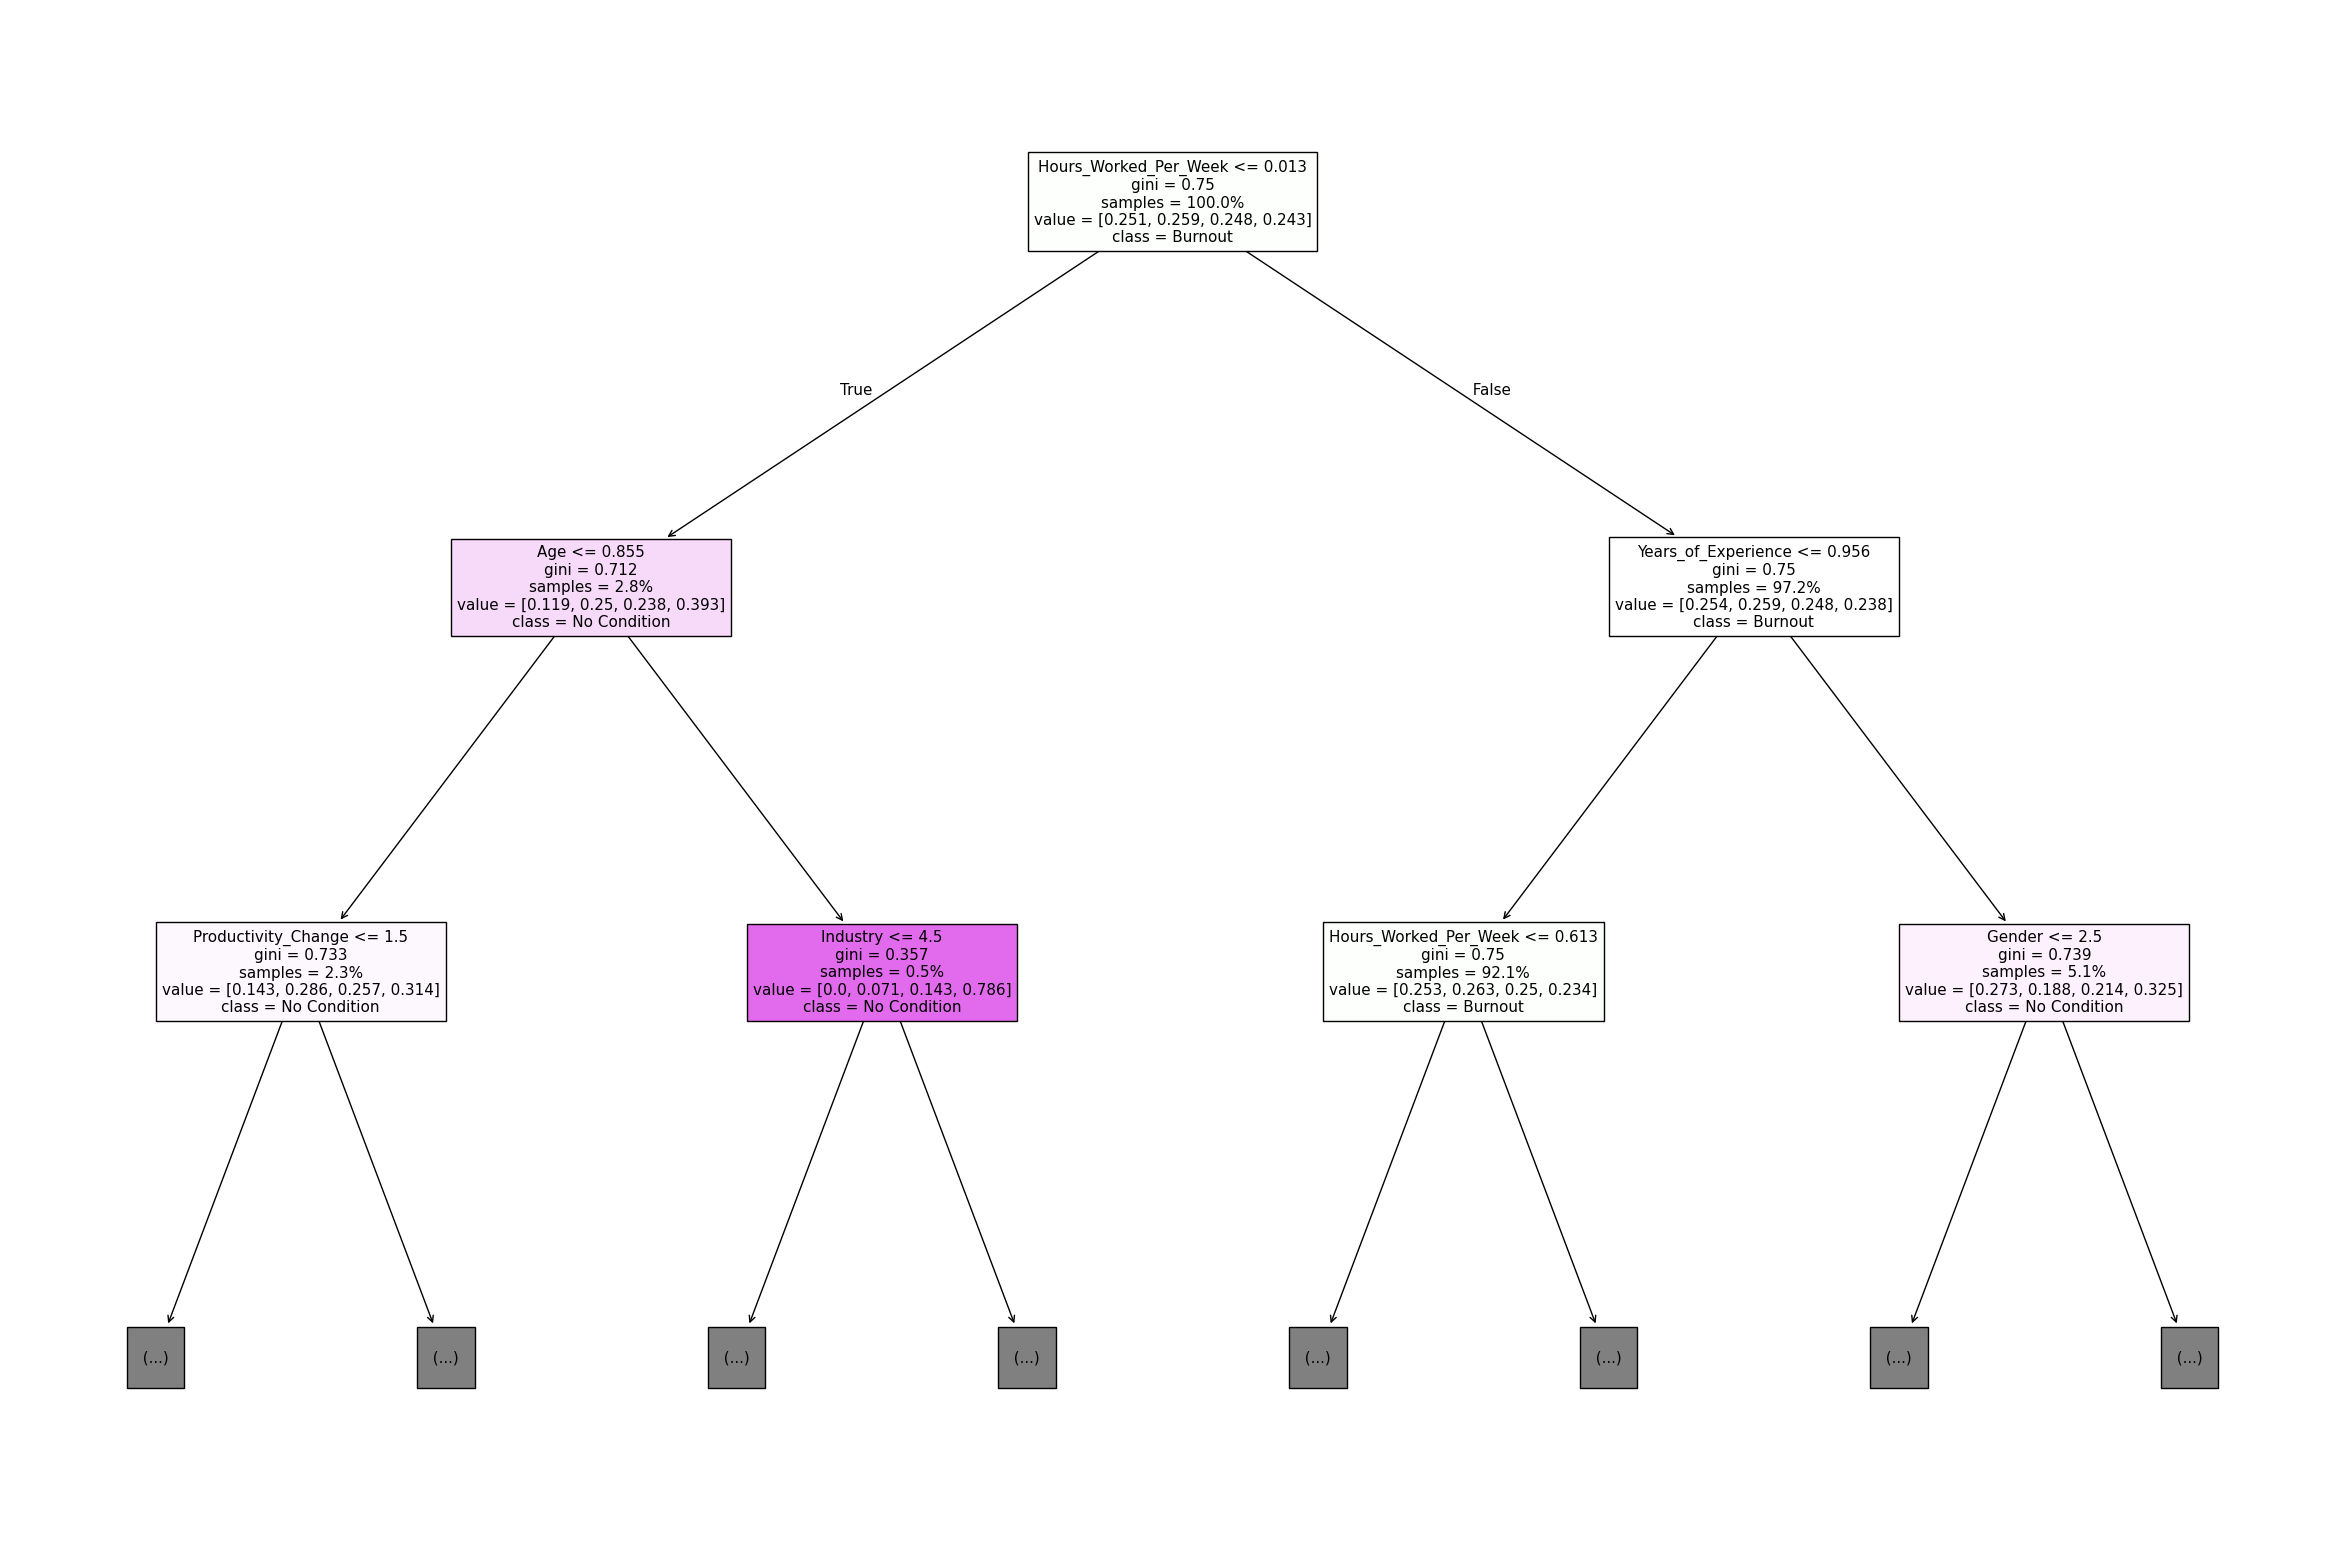

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(clf, proportion=True, feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=2)
plt.show()

#### Feature Importance

In [35]:
# Feature importance
features = X.columns.to_list()

feature_importance = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                              feature  importance
0                                 Age    0.113620
7          Number_of_Virtual_Meetings    0.098348
6               Hours_Worked_Per_Week    0.088189
4                 Years_of_Experience    0.081298
12            Social_Isolation_Rating    0.067473
3                            Industry    0.067440
2                            Job_Role    0.057403
14    Company_Support_for_Remote_Work    0.054382
17                             Region    0.053025
8            Work_Life_Balance_Rating    0.047312
1                              Gender    0.041551
15                  Physical_Activity    0.039005
9                        Stress_Level    0.037528
11                Productivity_Change    0.036635
13      Satisfaction_with_Remote_Work    0.035731
16                      Sleep_Quality    0.033436
5                       Work_Location    0.030156
10  Access_to_Mental_Health_Resources    0.017470


#### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

features = X.columns.to_list()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.01],
    'splitter': ['best', 'random']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the validation set
y_valid_pred = grid_search.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
y_test_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation score: 0.26566666666666666
Validation Accuracy: 0.252
Test Accuracy: 0.265

Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.28      0.35      0.31       263
     Burnout       0.25      0.30      0.27       249
  Depression       0.31      0.25      0.28       248
No Condition       0.22      0.15      0.18       240

    accuracy                           0.27      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.27      0.26      1000


Feature Importance:
                              feature  importance
8            Work_Life_Balance_Rating    0.090860
6               Hours_Worked_Per_Week    0.077708
16                      Sleep_Quality    0.071350
1                

#### Testing More Models

In [158]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

ModuleNotFoundError: No module named 'lazypredict'